# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


# Load dataset

In [3]:
data = pd.read_csv("G:/data science certificates/Amit lecturers/ML Project/Covid Data.csv")

In [4]:
df = data.copy()

In [5]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

(   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
 0      2             1    1             1  03/05/2020       97          1   
 1      2             1    2             1  03/06/2020       97          1   
 2      2             1    2             2  09/06/2020        1          2   
 3      2             1    1             1  12/06/2020       97          2   
 4      2             1    2             1  21/06/2020       97          2   
 
    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
 0   65         2         2  ...       2        2             1              2   
 1   72        97         2  ...       2        2             1              2   
 2   55        97         1  ...       2        2             2              2   
 3   53         2         2  ...       2        2             2              2   
 4   68        97         1  ...       2        2             1              2   
 
    CARDIOVASCULAR  OBESITY  RENAL_C

In [6]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
USMER,1048575.0,1.632194,0.482208,1.0,1.0,2.0,2.0,2.0
MEDICAL_UNIT,1048575.0,8.980565,3.723278,1.0,4.0,12.0,12.0,13.0
SEX,1048575.0,1.499259,0.500000,1.0,1.0,1.0,2.0,2.0
PATIENT_TYPE,1048575.0,1.190765,0.392904,1.0,1.0,1.0,1.0,2.0
INTUBED,1048575.0,79.522875,36.868886,1.0,97.0,97.0,97.0,99.0
PNEUMONIA,1048575.0,3.346831,11.912881,1.0,2.0,2.0,2.0,99.0
AGE,1048575.0,41.794102,16.907389,0.0,30.0,40.0,53.0,121.0
PREGNANT,1048575.0,49.765585,47.510733,1.0,2.0,97.0,97.0,98.0
DIABETES,1048575.0,2.186404,5.424242,1.0,2.0,2.0,2.0,98.0
COPD,1048575.0,2.260569,5.132258,1.0,2.0,2.0,2.0,98.0


In [8]:
df.shape

(1048575, 21)

In [9]:
df.duplicated().sum()

812049

# Convert 'DATE_DIED' into a binary feature (1 = Died, 0 = Survived)

In [10]:
df["DATE_DEAD"] = np.where(df["DATE_DIED"] == "9999-99-99", 0, 1)

# Replace missing values (97, 99) with NaN

In [11]:
df.replace({97: np.nan, 99: np.nan}, inplace=True)

# Convert Boolean features (1 = Yes, 2 = No) to (1 = Yes, 0 = No)

In [12]:
bool_columns = ["INTUBED", "PNEUMONIA", "PREGNANT", "DIABETES", "COPD", "ASTHMA",
                "INMSUPR", "HIPERTENSION", "OTHER_DISEASE", "CARDIOVASCULAR",
                "OBESITY", "RENAL_CHRONIC", "TOBACCO", "ICU"]

In [13]:
df[bool_columns] = df[bool_columns].replace({2: 0})

# Define 'HIGH_RISK' target variable (1 = severe case, 0 = mild case)

In [14]:
df["HIGH_RISK"] = ((df["DATE_DIED"] == 1) | (df["INTUBED"] == 1) | (df["ICU"] == 1)).astype(int)

# Drop redundant columns

In [15]:
df.drop(columns=["DATE_DIED", "INTUBED", "ICU"], inplace=True)

# Handle missing values

In [16]:
# Fill missing AGE values with the median
df["AGE"] = df["AGE"].fillna(df["AGE"].median())

# Fill missing categorical values (PNEUMONIA, PREGNANT) with mode
for col in ["PNEUMONIA", "PREGNANT"]:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])


# Outlier Detection

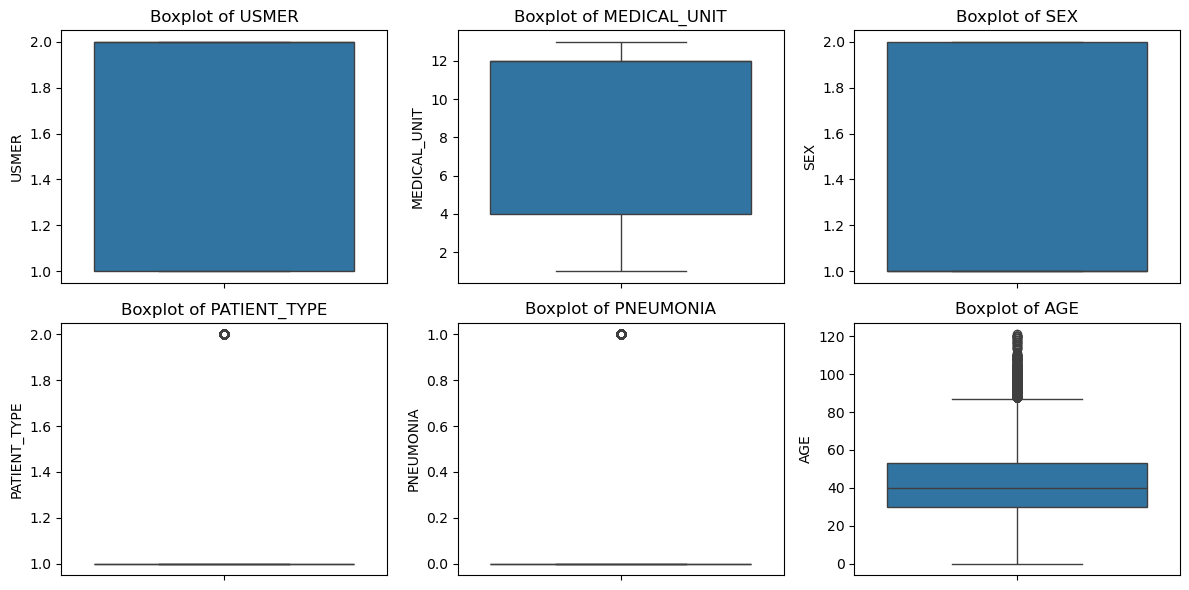

{'USMER': 0, 'MEDICAL_UNIT': 0, 'SEX': 0, 'PATIENT_TYPE': 200031, 'PNEUMONIA': 140038, 'AGE': 5419, 'PREGNANT': 11885, 'DIABETES': 128327, 'COPD': 18065, 'ASTHMA': 34551, 'INMSUPR': 17574, 'HIPERTENSION': 165833, 'OTHER_DISEASE': 33085, 'CARDIOVASCULAR': 23845, 'OBESITY': 162848, 'RENAL_CHRONIC': 21910, 'TOBACCO': 87596, 'CLASIFFICATION_FINAL': 0, 'DATE_DEAD': 76942, 'HIGH_RISK': 41208}


In [17]:
# Selecting only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['number']).columns

# Function to detect outliers using the IQR method
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

# Detect outliers for numerical features
outliers_dict = {col: detect_outliers(df, col) for col in numerical_cols}

# Plot boxplots for numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols[:6]):  # Limit to first 6 numerical columns for visibility
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Counting the number of outliers per feature
outlier_counts = {col: len(outliers_dict[col]) for col in numerical_cols}
print(outlier_counts)

# ---- DATA VISUALIZATION ----

### Plot Age Distribution by Risk Level:

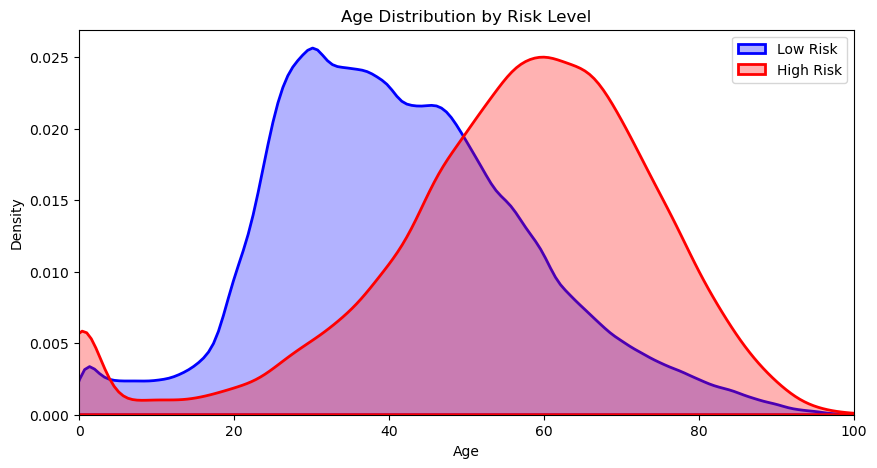

In [18]:
plt.figure(figsize=(10, 5))

# Low-risk patients
sns.kdeplot(df[df['HIGH_RISK'] == 0]['AGE'], label="Low Risk", color="blue", fill=True, alpha=0.3, linewidth=2)

# High-risk patients
sns.kdeplot(df[df['HIGH_RISK'] == 1]['AGE'], label="High Risk", color="red", fill=True, alpha=0.3, linewidth=2)

plt.title("Age Distribution by Risk Level")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 100)  # Limiting to a realistic range

plt.show()

### Correlation Heatmap

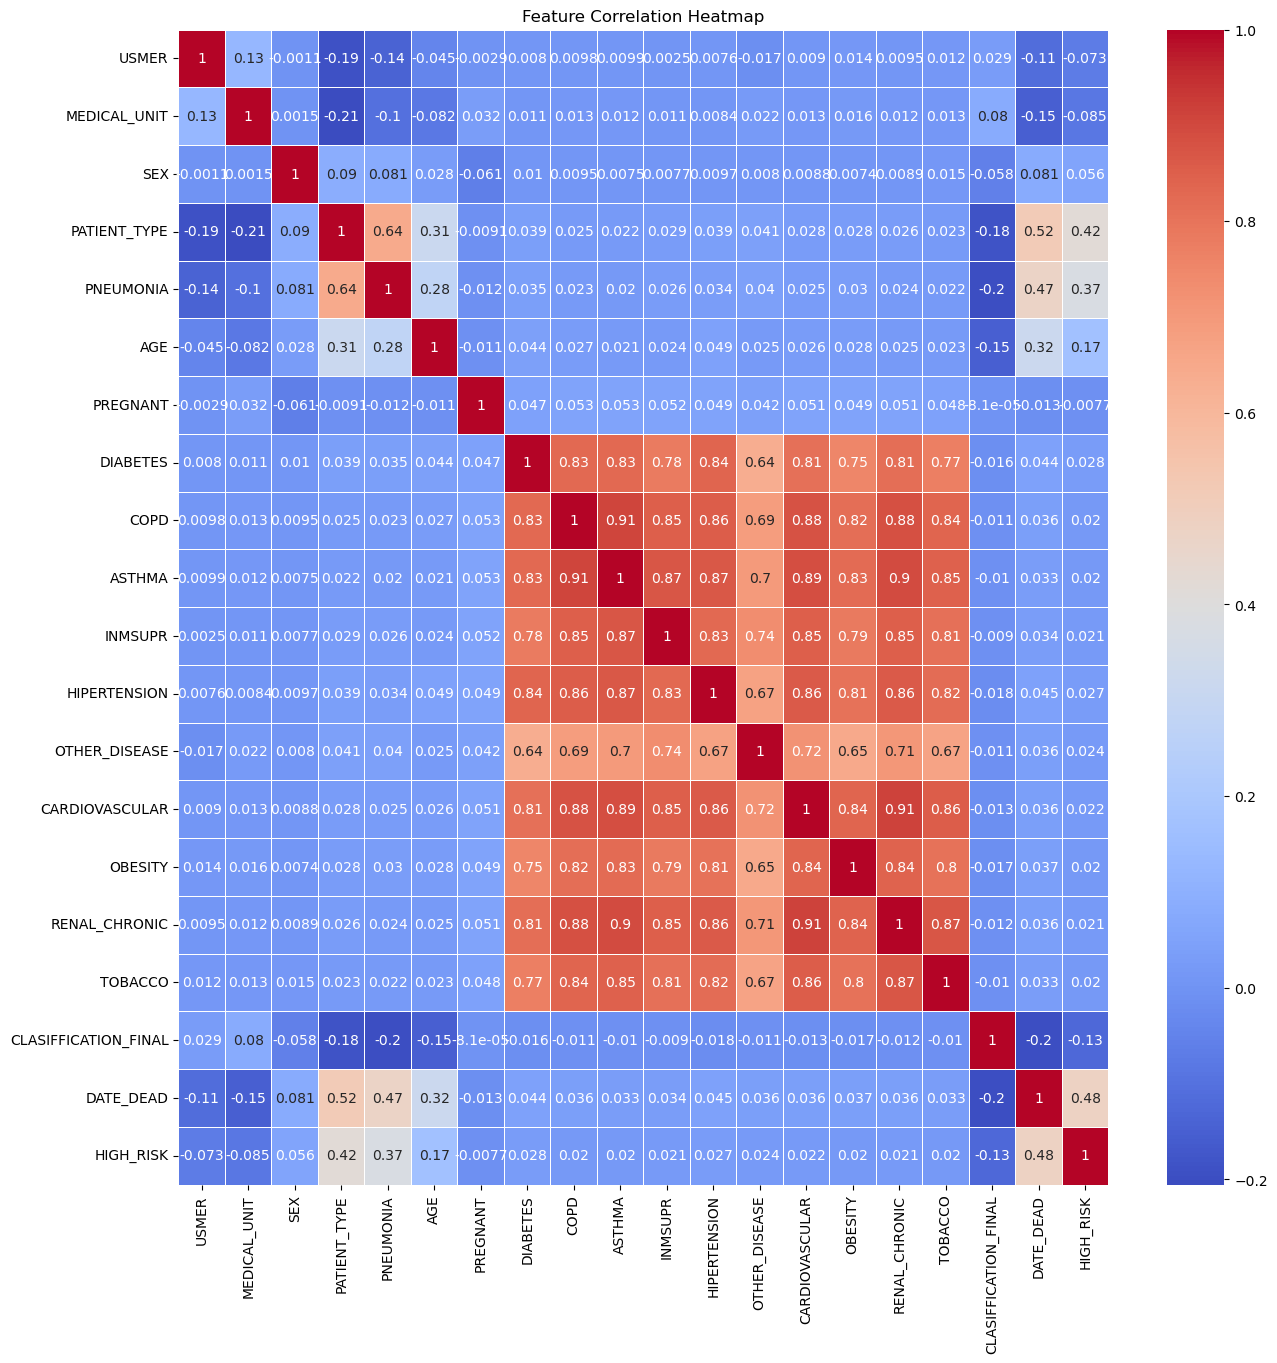

In [19]:

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<Figure size 1200x600 with 0 Axes>

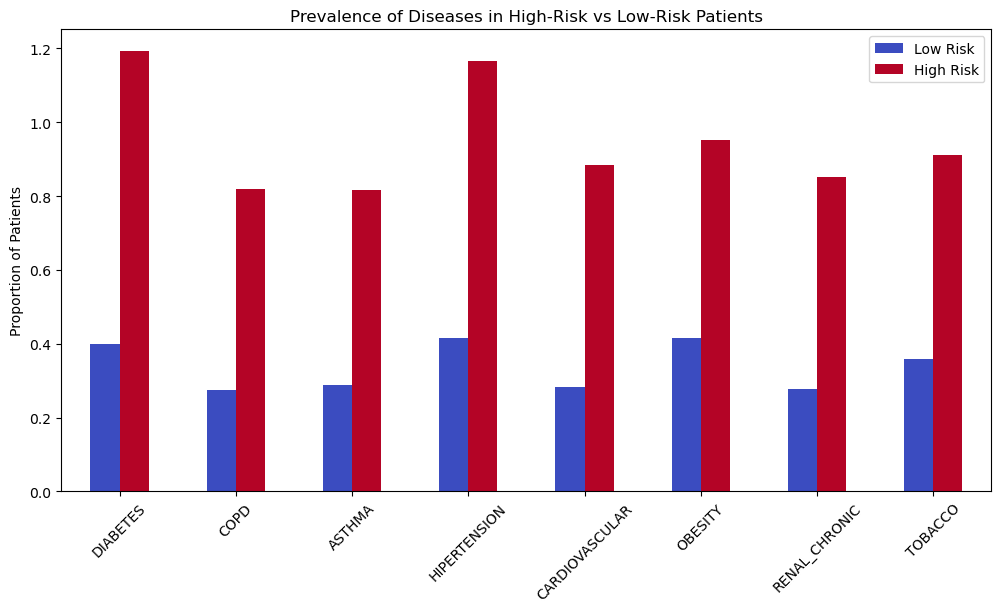

In [20]:
disease_cols = ["DIABETES", "COPD", "ASTHMA", "HIPERTENSION", "CARDIOVASCULAR", "OBESITY", "RENAL_CHRONIC", "TOBACCO"]

plt.figure(figsize=(12, 6))
df.groupby("HIGH_RISK")[disease_cols].mean().T.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Prevalence of Diseases in High-Risk vs Low-Risk Patients")
plt.ylabel("Proportion of Patients")
plt.xticks(rotation=45)
plt.legend(["Low Risk", "High Risk"])
plt.show()


# Classification Model Building

Split data into features (X) and target (y)

In [21]:

X = df.drop(columns=["HIGH_RISK"])
y = df["HIGH_RISK"]

Handle class imbalance using SMOTE

In [22]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train a Random Forest Classifier

In [23]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model

In [24]:

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9594586881153104

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96    201469
           1       0.94      0.99      0.96    201478

    accuracy                           0.96    402947
   macro avg       0.96      0.96      0.96    402947
weighted avg       0.96      0.96      0.96    402947



# Confusion Matrix

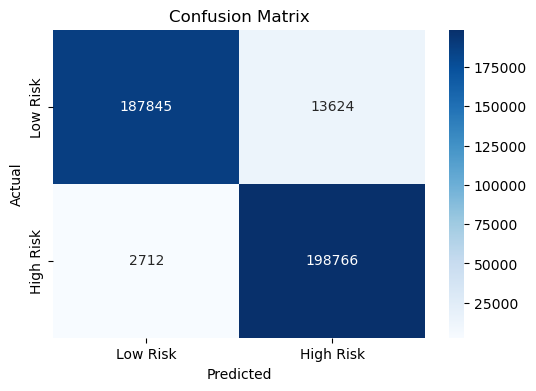

In [25]:

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Logistic Regression Model

c:\Users\osc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Accuracy: 0.9139
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91    201469
           1       0.88      0.96      0.92    201478

    accuracy                           0.91    402947
   macro avg       0.92      0.91      0.91    402947
weighted avg       0.92      0.91      0.91    402947



<Axes: >

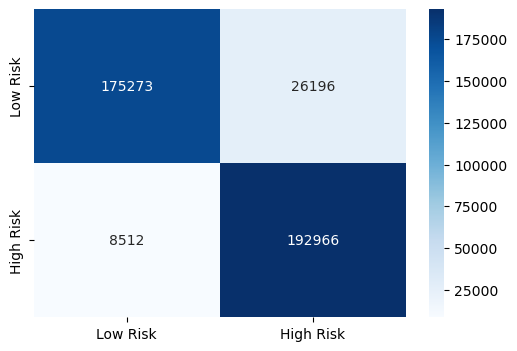

In [ ]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42)


# Train the model
log_reg_model.fit(X_train, y_train)

# Make predictions
log_reg_y_pred = log_reg_model.predict(X_test)

# Evaluate the model
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
log_reg_report = classification_report(y_test, log_reg_y_pred)
log_reg_confusion = confusion_matrix(y_test, log_reg_y_pred)


# Display results
print(f"--- Logistic Regression ---")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"Classification Report:\n{log_reg_report}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(log_reg_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])


# GradientBoosting Regression Model


--- GradientBoosting Regression ---
Accuracy: 0.9301
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93    201469
           1       0.89      0.98      0.93    201478

    accuracy                           0.93    402947
   macro avg       0.93      0.93      0.93    402947
weighted avg       0.93      0.93      0.93    402947



<Axes: >

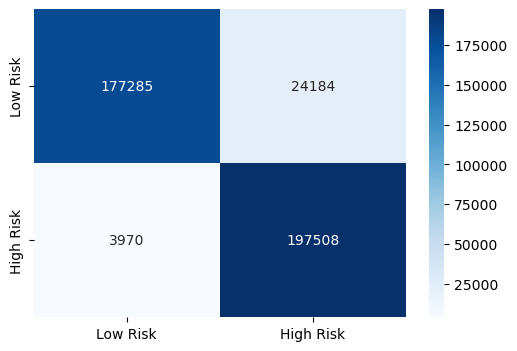

In [ ]:
# Initialize the GradientBoosting Regression model
GradientBoosting = GradientBoostingClassifier()


# Train the model
GradientBoosting.fit(X_train, y_train)

# Make predictions
GradientBoosting_pred = GradientBoosting.predict(X_test)

# Evaluate the model
GradientBoosting_accuracy = accuracy_score(y_test, GradientBoosting_pred)
GradientBoosting_report = classification_report(y_test, GradientBoosting_pred)
GradientBoosting_confusion = confusion_matrix(y_test, GradientBoosting_pred)


# Display results
print(f"--- GradientBoosting Regression ---")
print(f"Accuracy: {GradientBoosting_accuracy:.4f}")
print(f"Classification Report:\n{GradientBoosting_report}")

# Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(GradientBoosting_confusion, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
